The autograder will run with the following imports (and only the following imports). Depending on your notebook setup you may not actually need these imports, but its worth running this once at the start to be sure.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import colors

In [29]:
#grade

#INPUT:
# An integer rows storing the number of rows
# An integer cols storing the number of columns
#OUTPUT:
# A list of lists forming a 2D matrix.
# The output must be either a numpy.ndarray or a built-in python nested list

def emptyMatrix(rows, cols):
    matrix = np.zeros((rows, cols), dtype=float)
    return matrix
matrix = emptyMatrix(5,5)

In [30]:
#grade

#INPUT:
#A lists of lists forming a 2D matrix (using a built-in list)
#OUTPUT:
# A list of size 2 storing the number of rows at index 0 
# and the number of columns at index 1
def getSize(matrix):
    numRows = len(matrix)
    numColumns = len(matrix[0])
    shape = [numRows,numColumns]
    return shape
getSize(matrix)

[5, 5]

In [31]:
#grade

#INPUT:
# A lists of lists forming a 2D matrix (using a built-in list)
# A string fName storing the absolute path to a space-separated text file
#OUTPUT:
# A list of lists forming a 2D matrix.
# The output must be either a numpy.ndarray or a built-in python nested list
# The matrix should be the same dimensions as the input and must include all x,y pairs 
# found in the input file.
# NOTE: If an input pair has a coordinate larger than the matrix, it should be ignored
def importValues(matrix, fName):
    try:
        
        with open(fName, "r") as file:
            file_as_matrix = []
            for line in file:
                file_as_matrix.append(line.strip().split(" "))

            for i in range(len(file_as_matrix)):
                x = int(file_as_matrix[i][0])
                y = int(file_as_matrix[i][1])
                if 0 <= x < len(matrix) and 0 <= y < len(matrix[0]):
                    matrix[x][y] = 1
        return matrix
    except (FileNotFoundError, IOError):
        return None



In [32]:
#print(importValues(emptyMatrix(15,15), "data/crazy_25_25.txt"))

In [33]:
#grade

#INPUT:
# A lists of lists forming a 2D matrix (using a built-in list)
#OUTPUT:
# A list of lists forming a 2D matrix.
# The output must be either a numpy.ndarray or a built-in python nested list
# The matrix should be the same dimensions as the input and be the next timestamp
# of cellular automata. Your logic should consider indices past matrix boundaries 'empty'.
# NOTE: You should return a deep copy of the matrix, not a shallow one!

import copy # to create a deep copy later
def update(matrix):
    rows, columns = len(matrix), len(matrix[0]) # sets the rows and columns 
    matrix_2 = emptyMatrix(rows, columns) #creates an empty matrix where perform
    
    matrix_2 = copy.deepcopy(matrix)
    for x in range(rows):#going through the matrix. x = current row
        for y in range(columns): # going through matrix x = column
            neighbor_as_array = []
            for z in range(max(0, x-1), min(rows, x+2)):
                local_rows = []
                for i in range(max(0, y-1), min(columns, y+2)):
                    local_rows.append(matrix[z][i])
                neighbor_as_array.append(local_rows)
            prox_sum = 0
            prox_sum = sum(row[y] for row in neighbor_as_array for y in range(len(row))) - matrix[x][y] #the total sum of all the values surrounding the cell

                
                
            
            #Performs the update    
            """
            if matrix[z][i] == 1:
                if prox_sum < 2:
                    matrix_2[x][y] = 0
                if prox_sum == 2 or prox_sum == 3:
                    matrix_2[x][y] = 1
                if prox_sum > 3:
                    matrix_2[x][y] = 0
            elif matrix[z][i] == 0 and prox_sum == 3:
                matrix_2[x][y] = 1
            """
            
            if matrix[x][y] == 1:
                if prox_sum < 2 or prox_sum > 3:
                    matrix_2[x][y] = 0
            elif matrix[x][y] == 0:
                if prox_sum == 3:
                    matrix_2[x][y] = 1
            
                
            
    
    return matrix_2

In [34]:
update(importValues(emptyMatrix(15,15), "crazy_25_25.txt"))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

**Animation Code** In order to complete the autograded portion of this mini-project, you do not need to edit or modify the following functions. However you may want to modify things like the color, the framerate, or color boundaries when you visualize your own dataset.

In [35]:
#INPUT:
# a frameNumber
# a matplotlib AxesImage object
# a 2D matrix (Notably this can be a 3D matrix as well with individual colors as RGBs)
#OUTPUT:
# a matplotlib AxesImage object containing the updated matrix
def updateFig(frameNum, img, matrix):
    # The first frame should be the actual input dataset, not the first update step.
    if (frameNum == 0):
        return img    

    # NOTE: If you are making a gif for part 2, you will probably want to replace this
    # The main point is that you need to both update matrix and img with the new frame
    nm = update(matrix)
    
    matrix[:] = nm[:]

    img.set_data(nm)

    return img

#INPUT:
# a 2D matrix (Notably this can be a 3D matrix as well with individual colors as RGBs)
# an integer storing the number of steps
# a string storing the path and filename of the file to be written
#OUTPUT:
# None
# Instead an image or gif is saved to the location specified by outname
def animate(matrix, steps, outname):
    matrix = np.array(matrix)
    
    # NOTE: If you change these two lines you can adjust the color and bin sizes
    # This is only relevant for part 2 -- this code is not used or graded by the autograder
    cmap = colors.ListedColormap(['blue', 'yellow', 'red']) 
    bounds = [0, 1, 2, 3]


    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    plt.grid(False)
    img = ax.imshow(matrix, cmap=cmap, norm=norm)
    ani = animation.FuncAnimation(fig, updateFig, fargs=(img, matrix), frames=steps)


    ani.save(outname, fps=2)

Run-Code

MovieWriter ffmpeg unavailable; using Pillow instead.


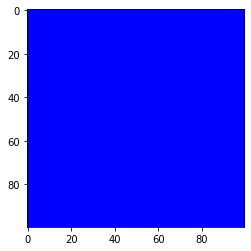

In [45]:
csv = open("Bitcoin_filtered.csv", "r")
string = csv.read()
file = open("Bitcoin_filtered.txt", "w")
writer = "" 
for letter in string:
    if letter == ",":
        writer += " "
    else:
        writer += letter
file.write(writer)
file.close()

myFile = "Bitcoin_filtered.txt"
xdim = 100
ydim = 100

em = emptyMatrix(xdim,ydim) 
em = importValues(em, myFile)

#animate(em, 10, 'yourOutput.gif')

# Here are the commands I used to produce the example gifs:
# (You will have to adjust 'myFile' as well as the x and y dimensions to match)
#animate(em, 30, 'horizLine_10_10_out.gif')
#animate(em, 15, 'multiSpinner_12_12.gif')
#animate(em, 15, 'horizLine_5_5_out.gif')
#animate(em, 20, 'vanish_5_5_out.gif')
#animate(em, 10, 'spinner_3_3_out.gif')
animate(em, 1, 'bitcoin.gif')
#animate(em, 2, 'vertLine_5_5_out.gif')